# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['leningradskiy',
 'ilulissat',
 'ushuaia',
 'new norfolk',
 'castro',
 'hermanus',
 'tasiilaq',
 'rolim de moura',
 'barentsburg',
 'karasburg',
 'broome',
 'tiarei',
 'krasnoselkup',
 'vaini',
 'isla vista',
 'irituia',
 'kaitangata',
 'butaritari',
 'hobart',
 'mayo',
 'upernavik',
 'mataura',
 'bodden town',
 'punta arenas',
 'touros',
 'port alfred',
 'fortuna',
 'samarai',
 'las navas',
 'jati',
 'rikitea',
 'bathsheba',
 'jamestown',
 'hithadhoo',
 'avarua',
 'votkinsk',
 'taolanaro',
 'viedma',
 'geilenkirchen',
 'marcona',
 'albany',
 'bargal',
 'salinopolis',
 'faanui',
 'tokur',
 'kefamenanu',
 'sept-iles',
 'barrow',
 'puerto ayora',
 'provideniya',
 'geraldton',
 'vestmanna',
 'skibbereen',
 'san quintin',
 'ayan',
 'ginda',
 'yellowknife',
 'perevolotskiy',
 'tuktoyaktuk',
 'wagar',
 'port keats',
 'pevek',
 'dikson',
 'nanortalik',
 'bluff',
 'grand-santi',
 'necochea',
 'belushya guba',
 'cururupu',
 'mar del plata',
 'katsuura',
 'victoria',
 'aljezur',
 'esperance',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
#Create Url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Create Empty Lists to create columns
humidity = []
wind = []
date = []
date = []
clouds = []
country = []
tempMax = []
lat = []
lng = []

#For loop to get city information
for city in cities:
        
    # Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    data = response
    try:
        wind.append(data["wind"]["speed"])
    except KeyError:
        wind.append(None)
    try:    
        humidity.append(data["main"]["humidity"])
    except KeyError:
        humidity.append(None)
    try:    
        date.append(data["dt"])
    except KeyError:    
        date.append(None)
    try:    
        clouds.append(data["clouds"]["all"])
    except KeyError:
        clouds.append(None)
    try:    
        country.append(data["sys"]["country"])
    except KeyError:
        country.append(None)
    try:    
        tempMax.append(data["main"]["temp_max"])
    except KeyError:
        tempMax.append(None)
    try:
        lat.append(data["coord"]["lat"])
    except KeyError:
        lat.append(None)
    try:    
        lng.append(data["coord"]["lon"])        
    except KeyError:
        lng.append(None)
    print(f"{city} is being processed")

leningradskiy is being processed
ilulissat is being processed
ushuaia is being processed
new norfolk is being processed
castro is being processed
hermanus is being processed
tasiilaq is being processed
rolim de moura is being processed
barentsburg is being processed
karasburg is being processed
broome is being processed
tiarei is being processed
krasnoselkup is being processed
vaini is being processed
isla vista is being processed
irituia is being processed
kaitangata is being processed
butaritari is being processed
hobart is being processed
mayo is being processed
upernavik is being processed
mataura is being processed
bodden town is being processed
punta arenas is being processed
touros is being processed
port alfred is being processed
fortuna is being processed
samarai is being processed
las navas is being processed
jati is being processed
rikitea is being processed
bathsheba is being processed
jamestown is being processed
hithadhoo is being processed
avarua is being processed
votki

caravelas is being processed
oulainen is being processed
taksimo is being processed
dicabisagan is being processed
tsihombe is being processed
shimanovsk is being processed
urdzhar is being processed
burns lake is being processed
itapeva is being processed
sorland is being processed
arani is being processed
dakar is being processed
sangmelima is being processed
tatawin is being processed
tura is being processed
maputo is being processed
vanderhoof is being processed
haines junction is being processed
dhone is being processed
golkoy is being processed
puerto baquerizo moreno is being processed
moree is being processed
esmeraldas is being processed
barbar is being processed
djambala is being processed
springdale is being processed
iquitos is being processed
marzuq is being processed
tarko-sale is being processed
wajir is being processed
ahipara is being processed
troitskoye is being processed
poselki is being processed
hami is being processed
forrest city is being processed
bubaque is be

harnoli is being processed
macamic is being processed
talnakh is being processed
liepaja is being processed
port-de-paix is being processed
yacopi is being processed
saku is being processed
semenivka is being processed
souillac is being processed
jiuquan is being processed
general roca is being processed
mokolo is being processed
udarnyy is being processed
huitzuco is being processed
kudahuvadhoo is being processed
linkou is being processed
dong xoai is being processed
djibo is being processed
ust-nera is being processed
kiama is being processed
hervey bay is being processed
wodonga is being processed
shaoyang is being processed
vega de alatorre is being processed
haibowan is being processed
airai is being processed
bonney lake is being processed
woodstock is being processed
tautira is being processed
zhaotong is being processed
potgietersrus is being processed
walvis bay is being processed
natal is being processed
lakes entrance is being processed
san cristobal is being processed
pa s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
#Create DataFrame
df = pd.DataFrame({"City": cities,
                   "Cloudiness": clouds,
                   "Country": country,
                   "Date": date,
                   "Humidity": humidity,
                   "Latitude": lat,
                   "Longitude": lng,
                   "Max Temp": tempMax,
                   "wind": wind})
df.to_csv(r"city_weather.csv")
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,wind
0,leningradskiy,98.0,RU,1.580009e+09,96.0,69.38,178.42,-12.55,4.12
1,ilulissat,92.0,GL,1.580009e+09,46.0,69.22,-51.10,6.80,10.29
2,ushuaia,75.0,AR,1.580009e+09,75.0,-54.80,-68.30,46.40,23.04
3,new norfolk,40.0,AU,1.580009e+09,35.0,-42.78,147.06,71.60,18.34
4,castro,0.0,BR,1.580009e+09,93.0,-24.79,-50.01,61.63,2.84


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

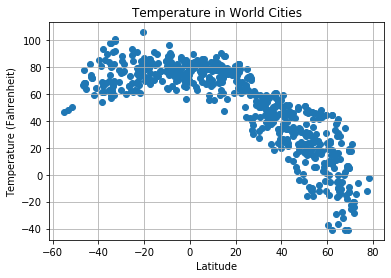

This shows how temperature increases as latitude gets closer to zero.


In [25]:
#Create Scatter
plt.scatter(df["Latitude"], df["Max Temp"], marker="o")

#Create Labels
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Show and Save
plt.show()
plt.savefig("Temperature in World Cities.png")
print("This shows how temperature increases as latitude gets closer to zero.")


#### Latitude vs. Humidity Plot

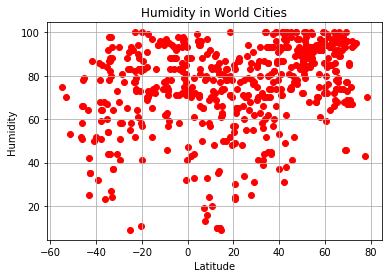

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(df["Latitude"], df["Humidity"], marker="o", color="red")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("Humidity in World Cities.png")

#### Latitude vs. Cloudiness Plot

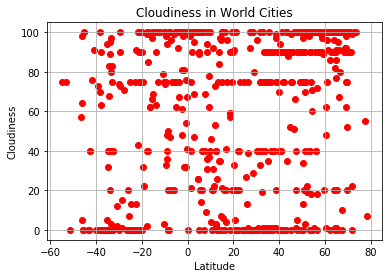

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(df["Latitude"], df["Cloudiness"], marker="o", color="red")
# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("Cloudiness in World Cities.png")

#### Latitude vs. Wind Speed Plot

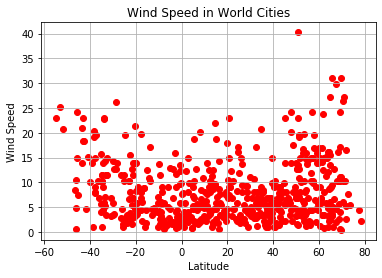

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(df["Latitude"], df["wind"], marker="o", color="red")
# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("Wind Speed in World Cities.png")

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames
southHem = df.loc[df["Latitude"] < 0]
northHem = df.loc[df["Latitude"] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

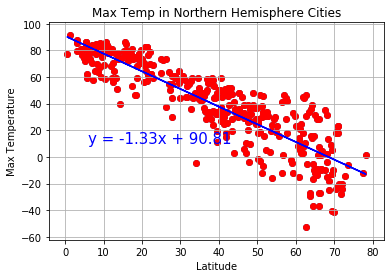

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = northHem["Latitude"]
y_values = northHem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", color="blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

plt.scatter(x_values, y_values, marker="o", color="red")

# Incorporate the other graph properties
plt.title("Max Temp in Northern Hemisphere Cities")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("MaxTempinNorthernHemisphereCities.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

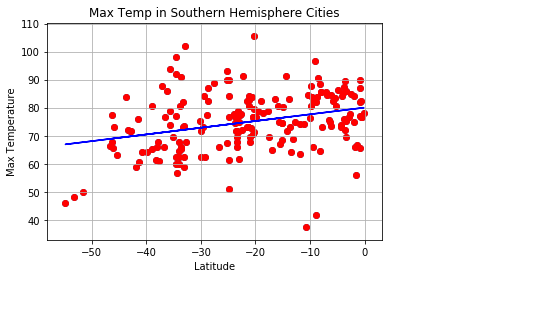

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = southHem["Latitude"]
y_values = southHem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", color="blue")
plt.annotate(line_eq, (6,10),fontsize=15, color="blue")

plt.scatter(x_values, y_values, marker="o", color="red")
# Incorporate the other graph properties
plt.title("Max Temp in Southern Hemisphere Cities")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("MaxTempinSouthernHemisphereCities.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

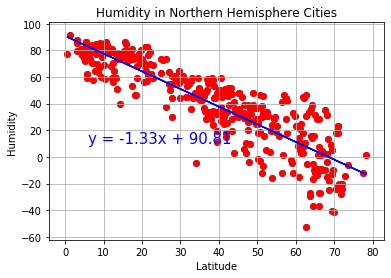

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = northHem["Latitude"]
y_values = northHem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", color="blue")
plt.annotate(line_eq,(6,10),fontsize=15, color="blue")

plt.scatter(x_values, y_values, marker="o", color="red")# Incorporate the other graph properties
plt.title("Humidity in Northern Hemisphere Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("HumidityinNortherHemisphereCities.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

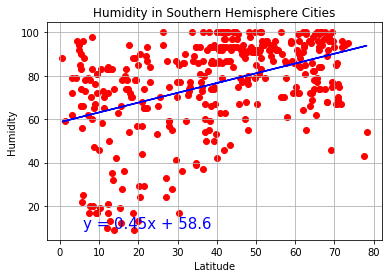

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = northHem["Latitude"]
y_values = northHem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="red")
plt.plot(x_values,regress_values,"r-", color="blue")
plt.annotate(line_eq,(6,10),fontsize=15, color="blue")
# Incorporate the other graph properties
plt.title("Humidity in Southern Hemisphere Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("HumidityinSouthernHemisphereCities.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

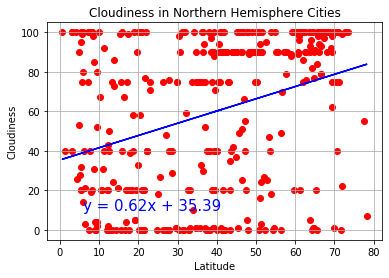

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = northHem["Latitude"]
y_values = northHem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="red")
plt.plot(x_values,regress_values,"r-", color="blue")
plt.annotate(line_eq,(6,10),fontsize=15, color="blue")
# Incorporate the other graph properties
plt.title("Cloudiness in Northern Hemisphere Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("CloudinessinNortherHemisphereCities.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

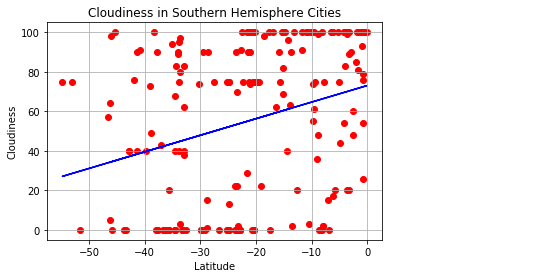

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = southHem["Latitude"]
y_values = southHem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="red")
plt.plot(x_values,regress_values,"r-", color="blue")
plt.annotate(line_eq,(6,10),fontsize=15, color="blue")
# Incorporate the other graph properties
plt.title("Cloudiness in Southern Hemisphere Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("CloudinessinSouthernHemisphereCities.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

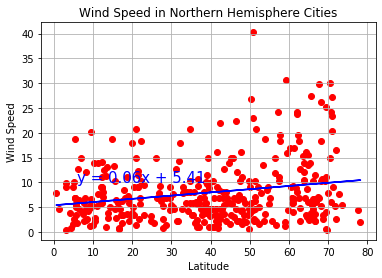

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = northHem["Latitude"]
y_values = northHem["wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="red")
plt.plot(x_values,regress_values,"r-", color="blue")
plt.annotate(line_eq,(6,10),fontsize=15, color="blue")
# Incorporate the other graph properties
plt.title("Wind Speed in Northern Hemisphere Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("WindSpeedinNortherHemisphereCities.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

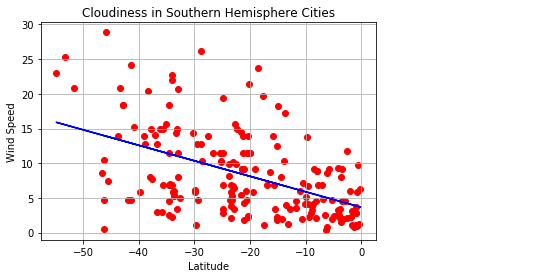

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = southHem["Latitude"]
y_values = southHem["wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="red")
plt.plot(x_values,regress_values,"r-", color="blue")
plt.annotate(line_eq,(6,10),fontsize=15, color="blue")
# Incorporate the other graph properties
plt.title("Cloudiness in Southern Hemisphere Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()
plt.savefig("CloudinessinSouthernHemisphereCities.png")